# **Image Classification**

In this notebook I have done classification of Cats and Dogs images using Support Vector Machine Classification algorithm.

In [ ]:
#import the necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

Let's create an empty list to store the images and another empty list to store the target values. Let the target value be 0 for Cat and 1 for Dog.

In [ ]:
data_array = [] #to store image

target_array = [] #to store the classification

In [ ]:
#Load the images

datadir = '/content/drive/MyDrive/Data'


Categories = os.listdir(datadir)
Categories

['Cat', 'Dog']

In [ ]:
for i in Categories:
  sub_path = os.path.join(datadir,i)
  images = os.listdir(sub_path)
  for img in images:
    img_path = os.path.join(sub_path,img)
    image_array = imread(img_path)    #reading the image as an array
    image_resized = resize(image_array,(150,150,3)) #scaling
    data_array.append(image_resized.flatten())
    target_array.append(Categories.index(i)) #Cat =0, Dog=1
  print("Loaded Category:",i)

Loaded Category: Cat
Loaded Category: Dog


In [ ]:
#Convert list to array

data = np.array(data_array)
data.shape

(126, 67500)

In [ ]:
target = np.array(target_array)
target.shape

(126,)

In [ ]:
#Splitting the dataset to train and test

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=1)

**Model Building**

In [ ]:
sv = SVC(kernel ='poly')
sv.fit(X_train,y_train)


SVC(kernel='poly')

In [ ]:
#Predicting using the model

y_pred = sv.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

**Model Evaluation**

              precision    recall  f1-score   support

           0       0.47      0.53      0.50        15
           1       0.67      0.61      0.64        23

    accuracy                           0.58        38
   macro avg       0.57      0.57      0.57        38
weighted avg       0.59      0.58      0.58        38



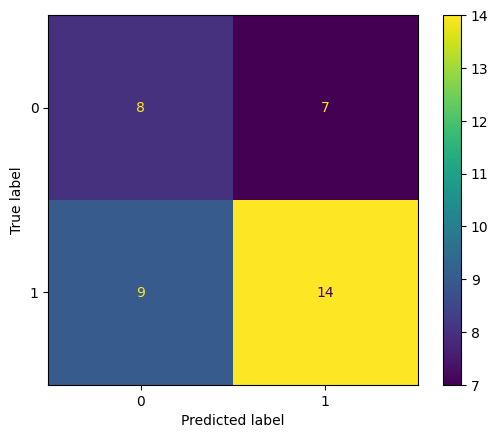

In [ ]:
#Model Evaluation

print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

The accuracy of the model is 58% which is low. It is because the number of images used for training the model was just 126. For better performance, training the model with large number of images is recommended.

**Model Testing**

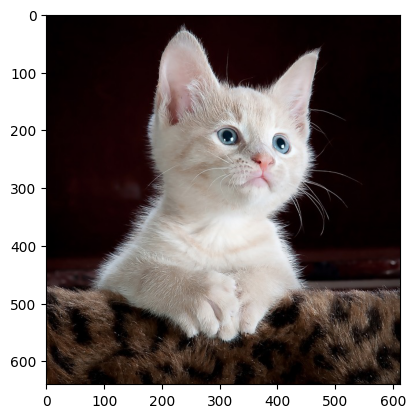

In [ ]:
#Testing uisng a new image

new = imread('/content/cat_new.jpg')
plt.imshow(new)
plt.show()


In [ ]:
new = resize(new,(150,150,3))
newimg = new.flatten()
newimg.shape

(67500,)

In [ ]:
newimg = newimg.reshape(1,-1)
newimg.shape

(1, 67500)

In [ ]:
y_new = sv.predict(newimg)


if y_new == 0:
  print("CAT")
else:
  print("DOG")

CAT


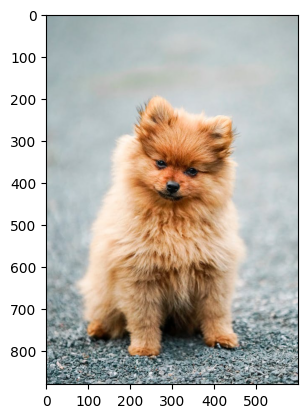

In [ ]:
new1 = imread('/content/dog_new.jpeg')
plt.imshow(new1)
plt.show()


In [ ]:
new1 = resize(new1,(150,150,3))
new1_img = new1.flatten()
new1_img.shape


(67500,)

In [ ]:
new1_img = new1_img.reshape(1,-1)
new1_img.shape

(1, 67500)

In [ ]:
y_new1 = sv.predict(new1_img)

if y_new1 == 0:
  print("CAT")
else:
  print("DOG")

DOG


Even with a low accuracy the model managed to give accurate predictions in this case.